# Activity

## 1.1 Perform a numerical derivative.

Mathematica provides a function for performing the derivative that uses a central differencing scheme. Using this function on the knife edge function in mathematica as follows,

```
H[z_, x_] = N[D[K [z, x], x]];
```

gives an approximation of the x-derivative of $k(x, z)$ (the knife edge function). A plot of this function and the table of values is shown in the applet at the end of this section 

## 1.2 Fit the derivative with a Gaussian function

Mathematica's "FindFit" function can be used to fit a user defined function to the users data. This function can be used to fit a generic gaussian to the results of taking the derivative of the knife edge data. Doing this correctly can produce good estimations of the waist and amplitude of the actually intensity profile being studied in the experiment.

***Note: The accuracy of the results produced here can be compared to data obtained from the original analytical functions in the Computation section.***

One can fit Mathematica's "NormalDistribution" function to the data as follows

```
model[x_] = ampl*Evaluate[PDF[NormalDistribution[x0, waist/2], x]];
FindFit[mydata, model[x], {{ampl, FindPeaks[mydata[[All, 2]]][[1, 2]]}, {x0, 0}, {waist, 50}}, x]
```
To get the best results, decent estimates for amplitude and waist need to be provided. The waist can be approximated any number of ways. However, the best way to approximate the amplitude is to use the data! The amplitude should be near the maximum amplitude value in the data table. "FindPeaks" is the Mathematica function used to obtain the largest value.

Unfortunately, although fitting to the "NormalDistribution" function produces a value for the waist that is very close to the actual value, the amplitude produced is terribly off the mark. 

An approach that produces much better results overall, is to manually define the Gaussian model that will be used for fitting to the data. Doing so,

```
altModel[x_] := ampl* Exp[-2*(x - x0)^2/waist^2];
FindFit[mydata, altModel[x], {{ampl, FindPeaks[mydata[[All, 2]]][[1, 2]]}, {x0, 0}, {waist, 50}}, x]
```

The results of fitting to the two models above can be found (in order) at the bottom of the applet below,


---

<iframe src="https://www.wolframcloud.com/obj/b239d7f5-cbeb-4d7b-9dcd-3c10d5ae504f" style="position: relative; height: 1600px; width: 100%;" frameborder="0"></iframe>

---

## 1.3 Make a plot of the beam envelope

The goal here is to plot the waist, which is obtained from the fit-results in the previous section, as a function of $z$.

One thing to consider is how many samples and where in $z$ should the samples be taken in order to produce a plot that displays the important features of $w(z)$. It can be presumed from the nature of diffraction that the greatest curvature in the waist is near its minimum. Far away form its minimum, $w(z)$ is linear. Only two points are needed to represent a line while a curve may need many more points. 

***Note: Students should realize that more points are needed around $z=0$. Also, student can use any number of ways to create the plot.***



### Plotting with Python

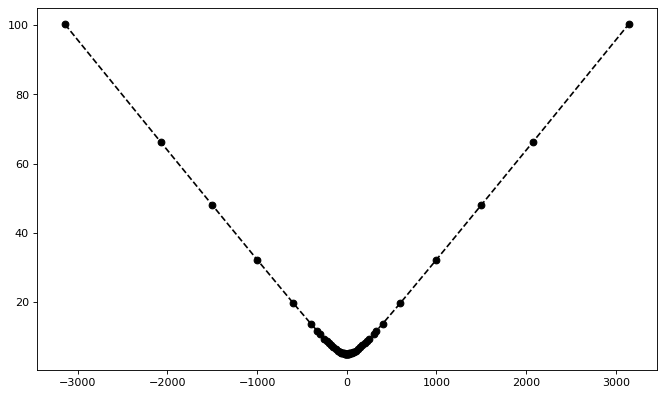

In [0]:
import numpy as np
import matplotlib.pyplot as plt

z = np.array([-3141.59, -2073.45, -1500.11, -997.456, -596.903, -400.553, -329.867, -298.451, -250, -225, -200, -175, -150, -125, -100, -80, -70, -60, -50, -40, -30, -20, -15, -10, -5, 0 ])
w = np.array([100.25, 66.1891, 48.0111, 32.1413, 19.6469, 13.6953, 11.6297, 10.7355, 9.39818, 8.73464, 8.09497, 7.48529, 6.91356, 6.38995, 5.92724, 5.61111, 5.47401, 5.35234, 5.24719, 5.15957, 5.09037, 5.04037, 5.02275, 5.01012, 5.00253, 5 ])

z = np.append(z,-1*np.flip(z)[1:] )  #created the full range using the mirror of z
w = np.append(w,np.flip(w)[1:])

fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(z, w, 'ko--')

## Questions

1.   **At what $z$ position is the spot size the smallest?**

>The spot size is the smallest at the $z$ position where the waist is the smallest which is at $z=0$. Note that here, "waist" is synonymous with "spot size."

2.   **What is the value of the smallest spot size $w_0$?**

>The value of the smallest spot size is 5.

3.   **What is the divergence angle θ?**

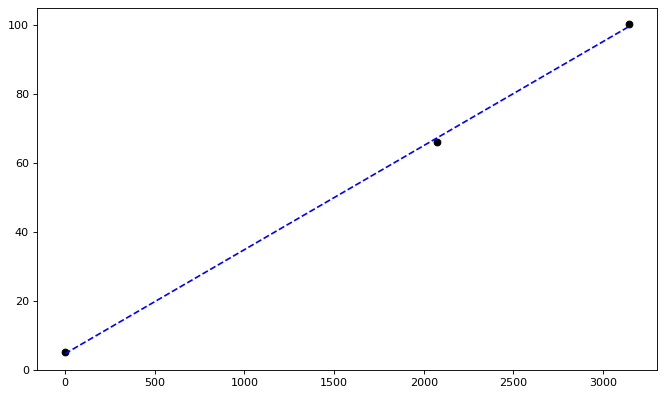

In [0]:
z_fit_coord = np.array([0, 2073.45, 3141.59])
w_fit_coord = np.array([5, 66.1891, 100.25])

#Get slope and intercept for the linear fit line
m, b = np.polyfit(z_fit_coord, w_fit_coord, 1)

fig = plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(z_fit_coord, w_fit_coord, 'ko', z_fit_coord, m*z_fit_coord + b, 'b--')

In [0]:
import math as math

divergence_angle = math.degrees(math.atan(m))

#Print the result
"  A. Divergence angle is " + str(divergence_angle) + " degrees."

'  A. Divergence angle is 1.730321593279073 degrees.'

4.   **What is the Rayleigh length $𝑧_𝑅$ of the beam?**

  >The Rayleigh length is $z_R = \frac{\pi w^2_0}{\lambda}$. The value can be determined from the data using the following equation,
  \begin{align}
  w(z) &= w_0 \sqrt{1 + \left(\frac{z}{z_R}\right)^2}\\
  &\Downarrow \\
  z_R &= \frac{z}{\sqrt{\left(\frac{w}{w_0}\right)^2 - 1}}
  \end{align}

In [0]:
#Calculate the square root quantity
w_0 = 5
temp_var = w/w_0
temp_var = temp_var*temp_var - 1.0
temp_var = np.sqrt(temp_var)

#Remove any zeros from what will go in the denominator 
#and remove the corresponding position
index_of_zero = np.argwhere(temp_var == 0)[0][0]
z_alt = np.delete(z, index_of_zero)
temp_var = np.delete(temp_var, index_of_zero)

#Put it all together to get z_R from each individual point
#then average all the z_R values to get one value. 
z_R = np.abs(z_alt/temp_var)
z_R_avg = np.mean(z_R)

"  A. The Rayleigh length is " + str(z_R_avg) + "."

'  A. The Rayleigh length is 157.07434013198065.'

  > Using the instructors parameters the exact answer should be 157.07963268.



5.   **What is the wavelength 𝜆 of the beam?**

  >The wavelength of the beam is



In [0]:
lambda_1 = (math.pi*w_0**2)/z_R_avg
lambda_1

0.5000168472695941

6.   **Does the beam power change along the propagation direction?**

  >No.

